<a href="https://colab.research.google.com/github/tankiet14102001/PM2.5-visualization_3D/blob/main/test_vertical_profile_20240214.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import os

# CHANGE THIS BELOW PATHS TO YOUR OWN DRIVE PATH CONTAINED YOUR FOLDER DATASET
path = '/content/gdrive/My Drive/Colab Notebooks/projects/thesis_dust-box_from-20240106/data/BKbox/'
os.chdir(path)
os.listdir()  # current folder structure in top layer

Mounted at /content/gdrive


['2023-딱2-01.txt',
 '2024-01-08 (1).txt',
 '2023-11-24.txt',
 '2023-11-25.txt',
 '2023-11-29.txt',
 '2023-12-02_DH.txt',
 '2023-11-30.txt',
 '2023-12-02.txt',
 '2023-11-27.txt',
 '2023-11-28.txt',
 '2023-11-26.txt',
 '2023-12-05.txt',
 '2023-12-07.txt',
 '2023-12-15.txt',
 '2023-12-14.txt',
 '2023-12-17.txt',
 '2023-12-21.txt',
 '2023-12-22.txt',
 '2023-12-24.txt',
 '2024-01-01.txt',
 '2023-12-26.txt',
 '2024-01-04.txt',
 '2024-01-05.txt',
 '2024-01-08.txt',
 '2024-01-11.txt',
 '2024-01-12.txt',
 '2024-01-05_1.txt',
 '2024-01-05_2.txt',
 '2024-01-05_3.txt',
 '2024-01-05_4.txt',
 '2024-01-12_1.txt',
 '2024-01-12_2.txt',
 '2024-01-12_3.txt',
 '2024-01-12_4.txt',
 'cleaned_data_file.txt',
 'filtered_data',
 '2024-01-15.txt',
 '2024-01-22.txt',
 '2024-01-26.txt',
 '2024-02-04.txt',
 '2024-01-01_filtered_data_map.html']

<ipython-input-6-9e263c50f970>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Alt'] = pd.to_numeric(filtered_data['Alt'], errors='coerce')
<ipython-input-6-9e263c50f970>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(subset=['Alt'], inplace=True)
<ipython-input-6-9e263c50f970>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

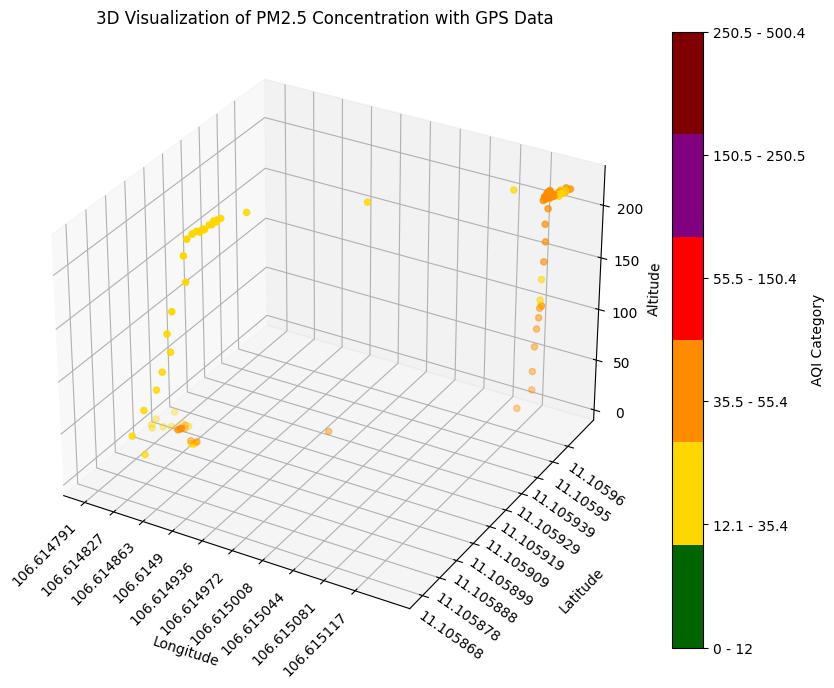

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.cm import ScalarMappable

# Step 1: Read the CSV file and filter required columns
data = pd.read_csv('2024-01-12_1.txt', header=None, names=["DateTime", "Temp", "Humi", "Press", "PM1_0", "PM2_5", "PM10", "Bat", "Lat", "Long", "Alt"], parse_dates=["DateTime"])
filtered_data = data[["DateTime", "PM2_5", "Lat", "Long", "Alt"]]

# Step 2: Prepare the data
# Convert 'Alt' column to numeric, coerce errors to NaN
filtered_data['Alt'] = pd.to_numeric(filtered_data['Alt'], errors='coerce')

# Drop rows with NaN values in 'Alt' column
filtered_data.dropna(subset=['Alt'], inplace=True)

# Convert 'Lat' and 'Long' columns to numeric
filtered_data['Lat'] = pd.to_numeric(filtered_data['Lat'], errors='coerce')
filtered_data['Long'] = pd.to_numeric(filtered_data['Long'], errors='coerce')

# Drop rows with NaN values in 'Lat' and 'Long' columns
filtered_data.dropna(subset=['Lat', 'Long'], inplace=True)

# Convert 'PM2_5' column to numeric, coerce errors to NaN
filtered_data['PM2_5'] = pd.to_numeric(filtered_data['PM2_5'], errors='coerce')

# Drop rows with NaN values in the 'PM2_5' column
filtered_data.dropna(subset=['PM2_5'], inplace=True)

# Step 3: Define AQI categories and assign colors
aqi = {
    'Good': {'pm2.5': [0, 12], 'color': '#006400'},
    'Moderate': {'pm2.5': [12.1, 35.4], 'color': '#FFD700'},
    'Unhealthy for Sensitive Groups': {'pm2.5': [35.5, 55.4], 'color': '#FF8C00'},
    'Unhealthy': {'pm2.5': [55.5, 150.4], 'color': 'red'},
    'Very Unhealthy': {'pm2.5': [150.5, 250.5], 'color': 'purple'},
    'Hazardous': {'pm2.5': [250.5, 500.4], 'color': 'maroon'}
}

# Function to map PM2.5 concentration to AQI category
def map_to_aqi_category(pm2_5):
    for category, thresholds in aqi.items():
        if thresholds['pm2.5'][0] <= pm2_5 <= thresholds['pm2.5'][1]:
            return category
    return None

# Map PM2.5 concentrations to AQI categories
filtered_data['AQI_Category'] = filtered_data['PM2_5'].apply(map_to_aqi_category)

# Step 4: Plot the data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with 'PM2_5' as color
colors = [aqi[category]['color'] for category in filtered_data['AQI_Category']]
sc = ax.scatter(filtered_data['Long'], filtered_data['Lat'], filtered_data['Alt'], c=colors)

# Customize labels and title
ax.set_xlabel('Longitude', labelpad=30)
ax.set_ylabel('Latitude', labelpad=30)
ax.set_zlabel('Altitude')
ax.set_title('3D Visualization of PM2.5 Concentration with GPS Data')

# Calculate step size for longitude and latitude axes
lon_step = (filtered_data['Long'].max() - filtered_data['Long'].min()) / 10
lat_step = (filtered_data['Lat'].max() - filtered_data['Lat'].min()) / 10

# Set tick locations and labels for longitude and latitude axes
ax.set_xticks(np.arange(filtered_data['Long'].min(), filtered_data['Long'].max(), lon_step))
ax.set_yticks(np.arange(filtered_data['Lat'].min(), filtered_data['Lat'].max(), lat_step))
ax.set_xticklabels(np.arange(filtered_data['Long'].min(), filtered_data['Long'].max(), lon_step).round(6), rotation=45, ha='right', va='center', rotation_mode='anchor')
ax.set_yticklabels(np.arange(filtered_data['Lat'].min(), filtered_data['Lat'].max(), lat_step).round(6), rotation=-35, ha='right', va='center', rotation_mode='anchor')

# Adjust the distance of y-ticks from the y-axis
ax.tick_params(axis='y', pad=30)

# Create a ScalarMappable to map data values to colors
sm = ScalarMappable(cmap=ListedColormap([aqi[category]['color'] for category in aqi]), norm=Normalize(vmin=0, vmax=len(aqi)-1))
sm.set_array([])  # Dummy array needed for ScalarMappable
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('AQI Category')

# Add boundaries of AQI categories to color bar
boundary_ticks = [(aqi[category]['pm2.5'][0] + aqi[category]['pm2.5'][1]) / 2 for category in aqi]
cbar.ax.set_yticks(np.arange(len(aqi)))
cbar.ax.set_yticklabels([f"{aqi[category]['pm2.5'][0]} - {aqi[category]['pm2.5'][1]}" for category in aqi.keys()])

plt.show()


In [ ]:
filtered_data.describe
# Print extracted latitude and longitude values
print(filtered_data[['Lat', 'Long']].head())


               Lat        Long
SPARC-1  11.106642  106.615055
SPARC-1  11.106641  106.615059
SPARC-1  11.106642  106.615064
SPARC-1  11.106641  106.615066
SPARC-1  11.106641  106.615066
